In [6]:
# --- Parte 1: Imports y datos ---
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
# Importar nuestro script de preprocesamiento
sys.path.append(os.path.abspath(".."))  # asegurar que Jupyter encuentre la carpeta scripts
from scripts.preprocessing import load_and_preprocess

# Cargar datos y preprocessor
X_train, X_test, y_train, y_test, preprocessor = load_and_preprocess()

In [8]:
# Crear pipeline con preprocessor + Support Vector Classifier
svm_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(random_state=42))
])

# Entrenar el modelo
svm_clf.fit(X_train, y_train)

# Evaluar en train y test
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

print("Reporte en TRAIN:")
print(classification_report(y_train, y_train_pred))

print("\nReporte en TEST:")
print(classification_report(y_test, y_test_pred))


Reporte en TRAIN:
              precision    recall  f1-score   support

           0       0.74      0.48      0.58        42
           1       0.83      0.94      0.88       114

    accuracy                           0.81       156
   macro avg       0.79      0.71      0.73       156
weighted avg       0.81      0.81      0.80       156


Reporte en TEST:
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        11
           1       0.76      0.89      0.82        28

    accuracy                           0.72        39
   macro avg       0.63      0.58      0.59        39
weighted avg       0.68      0.72      0.69        39



In [9]:
from sklearn.model_selection import GridSearchCV

# Definir el pipeline
svm_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC())
])

# Definir el grid de hiperparámetros
param_grid = {
    "classifier__kernel": ["linear", "rbf"],
    "classifier__C": [0.1, 1, 10],
    "classifier__gamma": ["scale", 0.01, 0.1, 1]
}

# GridSearch con validación cruzada
grid_search = GridSearchCV(
    svm_clf, 
    param_grid, 
    cv=5, 
    scoring="accuracy", 
    n_jobs=-1
)

# Entrenar
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

print("\nMejor score en validación cruzada:")
print(grid_search.best_score_)


Mejores parámetros encontrados:
{'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

Mejor score en validación cruzada:
0.7629032258064516


In [10]:
# Mejor modelo encontrado
best_svm = grid_search.best_estimator_

# Predicciones
y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)

print("Reporte en TRAIN (mejor SVM):")
print(classification_report(y_train, y_train_pred))

print("\nReporte en TEST (mejor SVM):")
print(classification_report(y_test, y_test_pred))

print("\nMatriz de confusión en TEST:")
print(confusion_matrix(y_test, y_test_pred))


Reporte en TRAIN (mejor SVM):
              precision    recall  f1-score   support

           0       0.74      0.62      0.68        42
           1       0.87      0.92      0.89       114

    accuracy                           0.84       156
   macro avg       0.81      0.77      0.78       156
weighted avg       0.83      0.84      0.83       156


Reporte en TEST (mejor SVM):
              precision    recall  f1-score   support

           0       0.40      0.36      0.38        11
           1       0.76      0.79      0.77        28

    accuracy                           0.67        39
   macro avg       0.58      0.57      0.58        39
weighted avg       0.66      0.67      0.66        39


Matriz de confusión en TEST:
[[ 4  7]
 [ 6 22]]


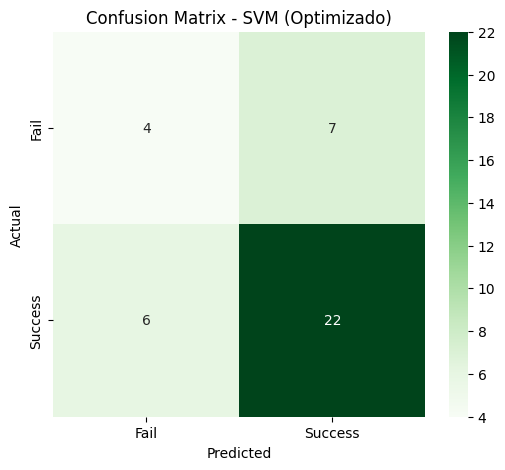

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de confusión para SVM optimizado
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Fail", "Success"], yticklabels=["Fail", "Success"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (Optimizado)")
plt.show()


In [12]:
from sklearn import set_config

# Para visualizar los pipelines como diagramas bonitos
set_config(display="diagram")

# Pipeline con SVM
svm_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(C=10, kernel="rbf", gamma="scale", random_state=42))
])

svm_clf


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
